In [52]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread

In [42]:
input_size = 128
UPLOAD_FOLDER = 'Images'
folder = "Images/"

## **Load the model**
from the result table of the Planet file vgg19 gives the best result so we load the model and doing prediction on vgg19 model.

In [34]:
root_path = 'Models'
from tensorflow.keras.models import model_from_json
file_path = os.path.join(root_path,'model_vgg(2).json')
json_file = open(file_path, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
weight_file = os.path.join(root_path,'best_model_cgg.h5')
model.load_weights(weight_file)
print("Loaded model from disk")

Loaded model from disk


## **Preprocess the data**

In [35]:

def load_test_data(img):
    img = img.resize((128, 128))
    # Preprocessing the image
    x = image.img_to_array(img)[:,:,:3]
    img = x/255
    return img

In [36]:
# this dictonary help ful to convert labels into numbers
label_map = {'agriculture': 8,
 'artisinal_mine': 1,
 'bare_ground': 6,
 'blooming': 13,
 'blow_down': 16,
 'clear': 5,
 'cloudy': 10,
 'conventional_mine': 12,
 'cultivation': 15,
 'habitation': 14,
 'haze': 11,
 'partly_cloudy': 4,
 'primary': 3,
 'road': 9,
 'selective_logging': 0,
 'slash_burn': 7,
 'water': 2}

# this dictonary help ful to convert numbers into labels
inv_label_map = {i: l for l, i in label_map.items()}

In [81]:
def helper(preds):
    p1=[]
    value=[]
    for p in range(len(preds)):
        if preds[p]>0.3:
            p1.append(p)
    for r in p1:        
        t = inv_label_map[r]
        value.append(t)
    return value    

In [82]:

def model_predict(img, model):
    img = folder + img + '.jpg'
    image = cv2.imread(img)
    img = cv2.resize(image,(128, 128))
    # Preprocessing the image
    x = np.array(img)[:,:,:3]
    img = x/255
    preds = model.predict(np.expand_dims(x, axis=0) )[0]
    preds = helper(preds)
    plt.imshow(image)
    print("Result is :",preds)


Result is : ['selective_logging', 'partly_cloudy', 'bare_ground', 'slash_burn']


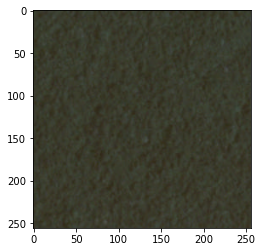

In [83]:
model_predict('2',model)